# Seoul_bike_sharing_demand_prediction

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
data_path = r"C:\seoul_bike_sharing_demand_prediction\data\SeoulBikeData.csv"
df = pd.read_csv(data_path, encoding="unicode_escape")
df.shape

(8760, 14)

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,2017-12-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


## Check Null Value

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

df["weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df.drop("Date", axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekday                    8760 non-null   objec

In [10]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


## EDA

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

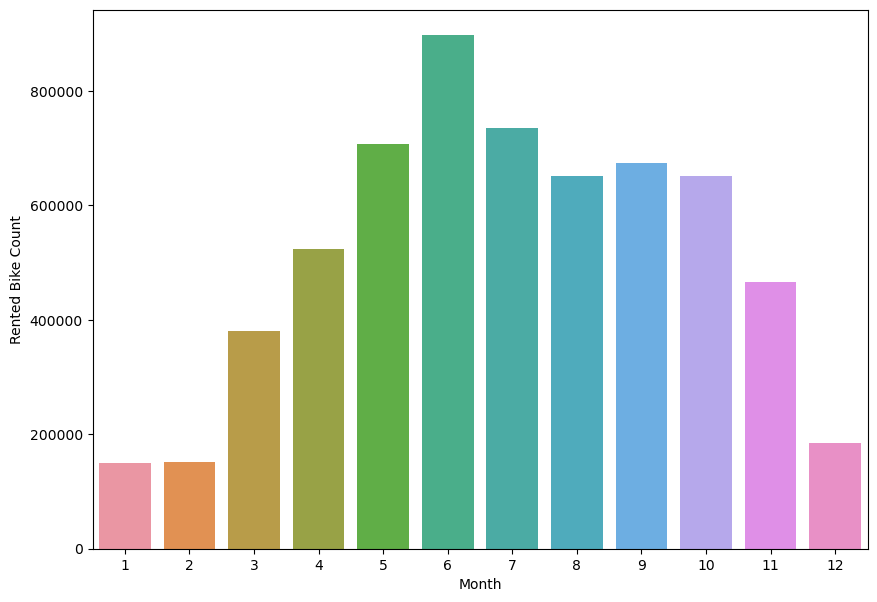

In [11]:
plt.figure(figsize=(10,7))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count",  data=Month)

## Remove Multicollinearity

In [12]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif

In [13]:
not_for_vif = ["Day", "Month", "Year", "Rented Bike Count"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [14]:
not_for_vif = ["Day", "Month", "Year", "Rented Bike Count", "Dew point temperature(°C)"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [15]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)

## Encoding

In [16]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [18]:
cat_features = ["Seasons", "Holiday", "Functioning Day", "weekday"]

In [19]:
df["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [20]:
df["Functioning Day"].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [21]:
df["Seasons"].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [22]:
df["weekday"].value_counts()

weekday
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [23]:
df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0, "Yes":1})

In [24]:
df_season = pd.get_dummies(df["Seasons"], drop_first = True)
df_weekday = pd.get_dummies(df["weekday"], drop_first = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [26]:
df = pd.concat([df, df_season, df_weekday], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int32  
 14  Month                   

In [28]:
df.drop(["Seasons", "weekday"], axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                  

In [30]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,2017,False,False,True,False,False,False,False,False,False
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,2017,False,False,True,False,False,False,False,False,False
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,2017,False,False,True,False,False,False,False,False,False
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,2017,False,False,True,False,False,False,False,False,False
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,2017,False,False,True,False,False,False,False,False,False


In [86]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day',
       'Month', 'Year', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [31]:
df.shape

(8760, 23)

## Split Data for Training & Testing

In [32]:
X = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (7008, 22)
Shape of y_train :  (7008,)
Shape of X_test :  (1752, 22)
Shape of y_test :  (1752,)


## Scaling

In [33]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [34]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56847888e+01, 6.50742009e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.41695205e-01, 1.43407534e-01, 1.42408676e-01, 1.40981735e-01,
       1.38413242e-01, 1.46118721e-01])

In [35]:
sc.scale_

array([6.92676802e+00, 1.20220548e+01, 2.04570722e+01, 1.03437653e+00,
       6.06508248e+02, 8.64469525e-01, 1.18093896e+00, 4.29006703e-01,
       2.16346743e-01, 1.76660323e-01, 8.78039972e+00, 3.45419336e+00,
       2.78737249e-01, 4.31853159e-01, 4.34566730e-01, 4.33505881e-01,
       3.48737257e-01, 3.50487965e-01, 3.49468804e-01, 3.48002709e-01,
       3.45333196e-01, 3.53225198e-01])

## Training ML Model
### Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred

array([  -3.42150244, 1022.33291293, 1474.26387368, ..., 1524.82148315,
        547.90926416,  739.64325466])

## Model Evaluation

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 186569.9819319257
RMSE : 431.9374745630734
MAE : 330.21078355249125
R2 : 0.5429221393038917


In [42]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE':{round(MSE,3)}, 'RMSE':{round(RMSE,3)}, 'MAE':{round(MAE,3)}, 'R2':{round(R2,3)}]")

In [43]:
get_metrics(y_test, y_pred, "LinearRegression")

LinearRegression : ['MSE':186569.982, 'RMSE':431.937, 'MAE':330.211, 'R2':0.543]


## Train Multiple Models

In [44]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [45]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [46]:
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [47]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

Ridge : ['MSE':186567.569, 'RMSE':431.935, 'MAE':330.2, 'R2':0.543]
Lasso : ['MSE':187028.139, 'RMSE':432.468, 'MAE':330.257, 'R2':0.542]
PolynomialFeatures : ['MSE':135020.833, 'RMSE':367.452, 'MAE':258.304, 'R2':0.669]
SVR : ['MSE':313071.334, 'RMSE':559.528, 'MAE':381.349, 'R2':0.233]
KNeighborsRegressor : ['MSE':100530.621, 'RMSE':317.066, 'MAE':207.508, 'R2':0.754]
DecisionTreeRegressor : ['MSE':61661.45, 'RMSE':248.317, 'MAE':134.297, 'R2':0.849]
RandomForestRegressor : ['MSE':29537.934, 'RMSE':171.866, 'MAE':98.307, 'R2':0.928]
XGBRegressor : ['MSE':24164.912, 'RMSE':155.451, 'MAE':95.454, 'R2':0.941]


## Visualise Model Prediction

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

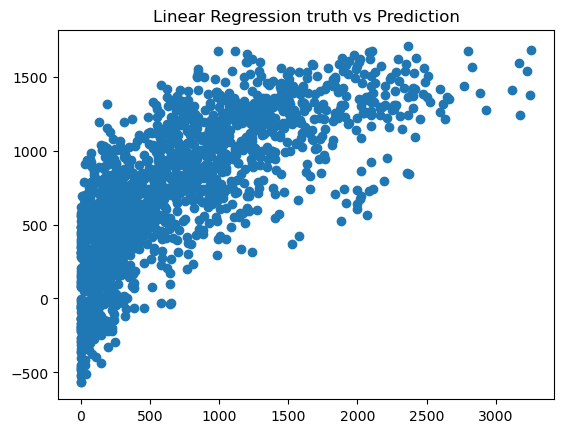

In [48]:
plt.scatter(y_test, y_pred)
plt.title("Linear Regression truth vs Prediction")
plt.x_label("Ground Truth")
plt.y_label("Prediction")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

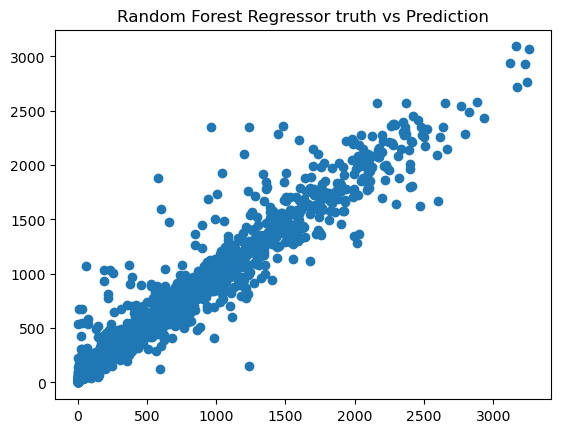

In [49]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regressor truth vs Prediction")
plt.x_label("Ground Truth")
plt.y_label("Prediction")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

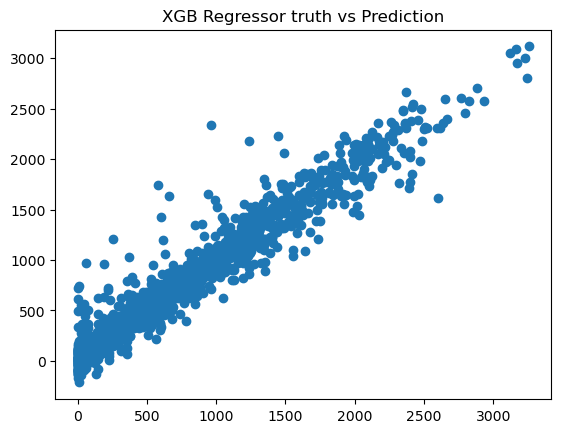

In [50]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGB Regressor truth vs Prediction")
plt.x_label("Ground Truth")
plt.y_label("Prediction")
plt.show()

## Hyperparameter Tuning for Random Forest Regressor

In [57]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10,120, num = 12)]

# Minimum number of samples required to split a node 
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [69]:
import time
start_time = time.time()

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred_rf_random = rf_random.predict(X_test)

print("Time teken to training using randomized search : ", time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Time teken to training using randomized search :  3525.612046957016


In [72]:
get_metrics(y_test, y_pred_rf_random, "RandomForestRegressor Fine Tuning")

RandomForestRegressor Fine Tuning : ['MSE':29150.687, 'RMSE':170.736, 'MAE':97.352, 'R2':0.929]


In [73]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [74]:
rf_tuned = RandomForestRegressor(n_estimators=1400,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                max_features="sqrt",
                                max_depth=100,
                                bootstrap=True)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

get_metrics(y_test, y_pred_rf_tuned, "RandomForestRegressor with best parameters")

RandomForestRegressor with best parameters : ['MSE':38677.149, 'RMSE':196.665, 'MAE':127.145, 'R2':0.905]


## Hyper Tuning for XGBoost Regressor

In [66]:
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

params = {'max_depth': [3, 5, 6, 10, 15, 20],
         'learning_rate': [0.01, 0.1, 0.2, 0.3],
         'subsample': np.arange(0.5, 1.0, 0.1),
         'colsample_bytree': np.arange(0.4, 1.0, 0.1),
         'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
         'n_estimators': [100, 500, 1000]}

xgbr = XGBRegressor(seed=20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         cv=5,
                         verbose=1)

rscv.fit(X_train, y_train)

y_pred_xgb_random = rscv.predict(X_test)

get_metrics(y_test, y_pred_xgb_random, "XGBRegressor with best parameters")

print("Time taken to training using randomized search: ", time.time()-start_time)

print("Best parameters : ", rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor with best parameters : ['MSE':22207.62, 'RMSE':149.022, 'MAE':86.272, 'R2':0.946]
Time taken to training using randomized search:  586.8332443237305
Best parameters :  {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7999999999999999}


In [67]:
xgbr = XGBRegressor(subsample=0.6,
                   n_estimators=100,
                   max_depth=6,
                   learning_rate=0.1,
                   colsample_bytree=0.7,
                   colsample_bylevel=0.4,
                   seed=20)

xgbr.fit(X_train, y_train)

y_pred_tuned = xgbr.predict(X_test)

get_metrics(y_test, y_pred_tuned, "XGBRegressor with best parameters")

XGBRegressor with best parameters : ['MSE':31807.104, 'RMSE':178.345, 'MAE':117.207, 'R2':0.922]


In [75]:
xgbr = XGBRegressor(subsample=0.6,
                   n_estimators=500,
                   max_depth=10,
                   learning_rate=0.09,
                   colsample_bytree=0.7,
                   colsample_bylevel=0.4,
                   seed=20)

xgbr.fit(X_train, y_train)

y_pred_tuned = xgbr.predict(X_test)

get_metrics(y_test, y_pred_tuned, "XGBRegressor with best parameters")

XGBRegressor with best parameters : ['MSE':21979.539, 'RMSE':148.255, 'MAE':89.361, 'R2':0.946]


## Save ML Best Model

In [77]:
import pickle
import os

dir = r"C:\seoul_bike_sharing_demand_prediction\models"
model_file_name = "xgboost_regressor_r2_0_946_v1.pkl"

model_file_path = os.path.join(dir, model_file_name)
model_file_path

'C:\\seoul_bike_sharing_demand_prediction\\models\\xgboost_regressor_r2_0_946_v1.pkl'

In [78]:
pickle.dump(xgbr, open(model_file_path, "wb"))

In [79]:
X_test[0,:]

array([ 1.07807977,  0.22192612,  0.77468297,  1.82005277, -1.26200749,
       -0.25194272, -0.12916836, -0.17535463, -0.22754885, -5.47803337,
       -0.64744078, -0.43640293,  0.30459857,  1.74132735, -0.58152447,
       -0.57866842, -0.40630934, -0.40916536, -0.4075004 ,  2.46842407,
       -0.40081071, -0.41367015])

In [80]:
y_test

3859       0
5647    1213
6735    1391
374      292
5791    1130
        ... 
1992     195
930      316
5634    2405
3291     164
6416     721
Name: Rented Bike Count, Length: 1752, dtype: int64

In [81]:
X_test[1,:]

array([-0.65432992,  1.24504573,  0.23697162, -0.5001855 ,  0.56154562,
       -0.28664608, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        0.94701966,  0.14260346,  0.30459857, -0.57427456,  1.71961809,
       -0.57866842, -0.40630934, -0.40916536, -0.4075004 , -0.40511677,
        2.49494334, -0.41367015])

In [82]:
X_test[2,:]

array([ 0.50060987,  0.98718632, -0.69180254,  2.40011233,  0.92262892,
        1.56419996, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
       -0.98911087,  0.72160984,  0.30459857, -0.57427456, -0.58152447,
       -0.57866842, -0.40630934, -0.40916536, -0.4075004 , -0.40511677,
       -0.40081071, -0.41367015])

## Dump Scaling Parameters

In [84]:
sc_dump_path = r"C:\seoul_bike_sharing_demand_prediction\models\sc.pkl"

pickle.dump(sc, open(sc_dump_path, "wb"))

## Present Your Solution

In [87]:
model_path = r"C:\seoul_bike_sharing_demand_prediction\models\xgboost_regressor_r2_0_946_v1.pkl"

model = pickle.load(open(model_path, "rb"))

In [88]:
data = [
       [ 1.07807977,  0.22192612,  0.77468297,  1.82005277, -1.26200749,
       -0.25194272, -0.12916836, -0.17535463, -0.22754885, -5.47803337,
       -0.64744078, -0.43640293,  0.30459857,  1.74132735, -0.58152447,
       -0.57866842, -0.40630934, -0.40916536, -0.4075004 ,  2.46842407,
       -0.40081071, -0.41367015],
       [-0.65432992,  1.24504573,  0.23697162, -0.5001855 ,  0.56154562,
       -0.28664608, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        0.94701966,  0.14260346,  0.30459857, -0.57427456,  1.71961809,
       -0.57866842, -0.40630934, -0.40916536, -0.4075004 , -0.40511677,
        2.49494334, -0.41367015],
       [ 0.50060987,  0.98718632, -0.69180254,  2.40011233,  0.92262892,
        1.56419996, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
       -0.98911087,  0.72160984,  0.30459857, -0.57427456, -0.58152447,
       -0.57866842, -0.40630934, -0.40916536, -0.4075004 , -0.40511677,
       -0.40081071, -0.41367015]
       ]

prediction = model.predict(data)
list(prediction)

[-48.7018, 1263.8368, 1451.4027]

### Load SC 

In [89]:
sc_dump_path = r"C:\seoul_bike_sharing_demand_prediction\models\sc.pkl"

sc = pickle.load(open(sc_dump_path, "rb"))

### Users Input

In [90]:
date = "11/06/2023"
hour = 14
temperature = 25
humidity = 91
wind_speed = 50
visibility = 70
solar_radiation = 3
rainfall = 30
snowfall = 0.0
seasons = "Spring"
holiday = "Holiday"
functioning_day = "No"

### Converting User Data into Model Consumable Formate

In [93]:
from datetime import datetime
holiday_dic = {"No Holiday": 0, "Holiday": 1}
functioning_dic = {"No":0, "Yes":1}

def get_string_to_datetime(date):
    dt = datetime.strptime(date, "%d/%m/%Y")
    return {"day": dt.day, "month": dt.month, "year": dt.year, "week_day": dt.strftime("%A")}

str_to_date = get_string_to_datetime(date)
str_to_date

{'day': 11, 'month': 6, 'year': 2023, 'week_day': 'Sunday'}

In [94]:
u_input_list = [hour, temperature, humidity, wind_speed, visibility, solar_radiation, rainfall, snowfall,
               holiday_dic[holiday], functioning_dic[functioning_day],
                str_to_date["day"], str_to_date["month"], str_to_date["year"]]

features_name = ["Hour", 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day', 'Month', 'Year']

df_u_input = pd.DataFrame([u_input_list], columns=features_name)
df_u_input

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year
0,14,25,91,50,70,3,30,0.0,1,0,11,6,2023


In [95]:
def season_to_df(seasons):
     seasons_cols = ['Spring', 'Summer', 'Winter']
     seasons_data = np.zeros((1, len(seasons_cols)), dtype="int")

     df_seasons = pd.DataFrame(seasons_data, columns=seasons_cols)
     if seasons in seasons_cols:
         df_seasons[seasons]=1     
     return df_seasons

df_seasons = season_to_df(seasons)
df_seasons

,Spring,Summer,Winter
0,1,0,0


In [96]:
def days_df(week_day):
     days_names = ['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
     days_name_data = np.zeros((1, len(days_names)), dtype="int")

     df_days = pd.DataFrame(days_name_data, columns=days_names)
     if week_day in days_names:
         df_days[week_day]=1     
     return df_days

df_days = days_df(str_to_date["week_day"])
df_days

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0


In [97]:
df_for_pred = pd.concat([df_u_input, df_seasons, df_days], axis=1)
df_for_pred

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,Year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,14,25,91,50,70,3,30,0.0,1,0,...,2023,1,0,0,0,0,1,0,0,0


In [98]:
sc_data_for_pred = sc.transform(df_for_pred)
sc_data_for_pred

array([[ 0.3562424 ,  1.01214045,  1.60569143, 46.67799252, -2.25952072,
         2.81352104, 25.27434606, -0.17535463,  4.39466079, -5.47803337,
        -0.53355074, -0.14689974, 18.24263884,  1.74132735, -0.58152447,
        -0.57866842, -0.40630934, -0.40916536,  2.45398535, -0.40511677,
        -0.40081071, -0.41367015]])

### Prediction in deployment

In [99]:
model.predict(sc_data_for_pred)

print(f"Rented Bike Demand On date : {date}, and Time: {hour} is : {round(model.predict(sc_data_for_pred).tolist()[0])}")

Rented Bike Demand On date : 11/06/2023, and Time: 14 is : 303
